In [1]:
import networkx as nx
import ndlib.models.ModelConfig as mc
from bokeh.io import show
import ndlib.models.epidemics.SIModel as si
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import json
# Network topology
#G = nx.karate_club_graph()
fh=open("dolphins.txt", 'rb')
G = nx.read_weighted_edgelist(fh,nodetype=None, encoding='utf-8')
fh.close()
H = nx.convert_node_labels_to_integers(G, first_label=0, ordering="default", label_attribute = None)

In [2]:
from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")
nodes = nx.density(G)
b = nodes
it = 50
i=48
j=43
#--------------------------------------------------------------
model = si.SIModel(H)
config = mc.Configuration()


config.add_model_parameter('beta', b)


infected_nodes = [i]
config.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(config)

#iterations = model.iteration_bunch(it)
#trends = model.build_trends(iterations)
trends = multi_runs(model, execution_number=10, iteration_number=it, nprocesses=4)
#--------------------------------------------------------------
model1 = si.SIModel(H)
config = mc.Configuration()


config.add_model_parameter('beta', b)

infected_nodes1 = [j]
config.add_model_initial_configuration("Infected", infected_nodes1)
model1.set_initial_status(config)

#iterations = model1.iteration_bunch(it)
#trends1 = model1.build_trends(iterations)
trends1 = multi_runs(model, execution_number=10, iteration_number=it, nprocesses=4)
#--------------------------------------------------------------

In [3]:
b

0.08408249603384453

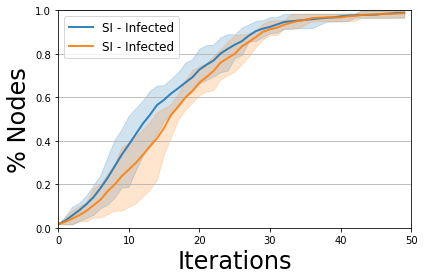

In [4]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model,model1], [trends,trends1], statuses=['Infected'])
viz.plot()
#viz.plot("dolphins44_9.png",percentile=90)

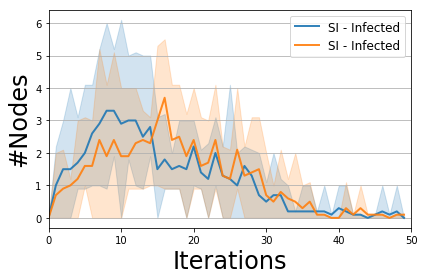

In [5]:
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([model, model1], [trends, trends1], statuses=['Infected'])
viz.plot()
#viz.plot("dolphins44_9p.png",percentile=90)